# VapoRock
* A thermodynamic model for vaporized silicate rocks & melts relevant to magma ocean atmospheres and stellar nebula

In [3]:
import vaporock

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
from thermoengine import model

/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/numdifftools/extrapolation.py:10: DeprecationWarning: Please use `convolve1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve1d
/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/numdifftools/multicomplex.py:35: DeprecationWarning: `finfo.machar` is deprecated (NumPy 1.22)
  _TINY = np.finfo(float).machar.tiny
/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/sympy/external/importtools.py:158: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(modversion) < LooseVersion(min_module_version):


In [4]:
vapor_densities = pd.read_excel('data/Schaefer2009-valid-data-fig2.xlsx',sheet_name=None)

In [5]:
O2 = vapor_densities['O2']
O = vapor_densities['O']

In [6]:
O2['log_dens'] = np.log10(O2['density'])
O['log_dens'] = np.log10(O['density'])

In [23]:
plt.figure()
plt.semilogy(O2['T'],O2['density'],'k-',label='O2')
plt.semilogy(O['T'],O['density'],'r-',label='O')
plt.title('Oxygen column densities')
plt.xlabel('T  [K]')
plt.ylabel(f'Column density [molecules cm$^-$$^2$]')
plt.legend()

In [15]:
NA = 6.022e+23 #avogadro number
g=36.2 # gravity in m/s of CoRot-7b

O2['P'] = g*32*O2['density']/NA
O['P'] = g*16*O['density']/NA

O2['logP'] = np.log(O2['P'])
O['logP'] = np.log(O['P'])

In [22]:
plt.figure()
plt.semilogy(O2['T'],O2['P'],'k-',label='O2')
plt.semilogy(O['T'],O['P'],'r-',label='O')
plt.title('Oxygen vapor pressures')
plt.xlabel('T  [K]')
plt.ylabel(f'Partial pressure [bars]')
plt.legend()

In [19]:
''' Fit fO2 and p(O)'''
poly_O2 = np.polyfit(O2['T'],O2['logP'],5)
poly_O = np.polyfit(O['T'],O['logP'],5)
T = np.linspace(1700,3000,101)
logPmod_O2 = np.polyval(poly_O2, T)
logPmod_O = np.polyval(poly_O, T)

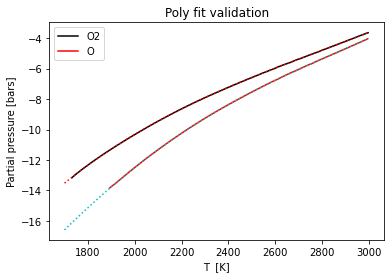

In [24]:
'''Validate polynomial fit'''
plt.figure()
plt.plot(O2['T'],O2['logP'],'k-',label='O2')
plt.plot(T, logPmod_O2, 'r:')
plt.plot(O['T'],O['logP'],'r-',label='O')
plt.plot(T, logPmod_O, 'c:')
plt.title('Poly fit validation')
plt.xlabel('T  [K]')
plt.ylabel(f'Partial pressure [bars]')
plt.legend()

In [10]:
plt.figure()
plt.plot(T, logPmod_O-0.5*logPmod_O2,'k-')


In [11]:
system = vaporock.System()

/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/vaporock/data/vapor-thermo-data.csv


/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/thermoengine/model.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._phase_info = self._phase_info.append(phs_info, ignore_index=True)
/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/thermoengine/model.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._phase_info = self._phase_info.append(phs_info, ignore_index=True)
/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/thermoengine/model.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._phase_info = self._phase_info.append(phs_info, ignore_index=True)
/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/thermoengine/model.py:184: FutureWarning: The frame.ap

In [12]:
vapor = system.vapor

In [13]:
G_spec, G_O2 = vapor.eval_gibbs_species(T)

In [14]:
logPratio = -1/(8.314*T)*(G_spec.loc['O(g)']-0.5*G_O2)

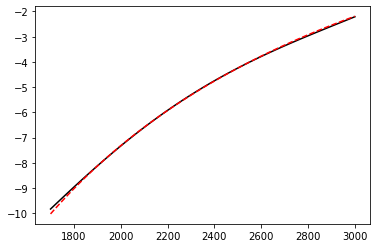

In [15]:
''' Compare O/O2 ratio from Fegley 2009 with vaporock'''
plt.figure()
plt.plot(T, logPmod_O-0.5*logPmod_O2,'k-')
plt.plot(T, logPratio, 'r--')

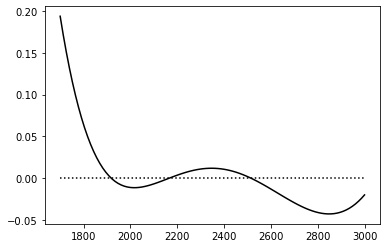

In [16]:
plt.figure()
plt.plot(T, logPmod_O-0.5*logPmod_O2-logPratio,'k-')
plt.plot(T, 0*T, 'k:')

In [17]:
LOG10_FAC = np.log10(np.exp(1))

In [18]:
logfO2 = logPmod_O2*LOG10_FAC

In [19]:
# melt_comp_wts = {'MgO':36.9, 'CaO':3.3, 'Al2O3':4.6, 'SiO2':50.7, 
#                  'Na2O':3e-7, 'K2O':3e-10, 'FeO':3.5}

# BSE composition from Schaefer & Fegley (TiO2 neglected)
melt_comp_wts = {'SiO2':45.97, 'MgO':36.66, 'Al2O3':4.77, 'FeO':8.24, 
                 'CaO':3.78, 'Na2O':0.35, 'K2O':0.04} # 'TiO2':0.18


In [20]:
system = vaporock.System()
system.set_melt_comp(melt_comp_wts)
system.print_melt_comp()

/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/vaporock/data/vapor-thermo-data.csv
MELTS liquid components:


/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/thermoengine/model.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._phase_info = self._phase_info.append(phs_info, ignore_index=True)
/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/thermoengine/model.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._phase_info = self._phase_info.append(phs_info, ignore_index=True)
/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/thermoengine/model.py:184: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self._phase_info = self._phase_info.append(phs_info, ignore_index=True)
/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/thermoengine/model.py:184: FutureWarning: The frame.ap

[('SiO2', 0.09376302671600419),
 ('TiO2', 0.0),
 ('Al2O3', 0.02427604939215259),
 ('Fe2O3', 0.0),
 ('MgCr2O4', 0.0),
 ('Fe2SiO4', 0.03002944129782759),
 ('MnSi0.5O2', 0.0),
 ('Mg2SiO4', 0.23815793315057002),
 ('NiSi0.5O2', 0.0),
 ('CoSi0.5O2', 0.0),
 ('CaSiO3', 0.03529746281790487),
 ('Na2SiO3', 0.002957188086717984),
 ('KAlSiO4', 0.00044474936870234484),
 ('Ca3(PO4)2', 0.0),
 ('H2O', 0.0)]

In [21]:
logP, lnK, lna =  system.eval_gas_abundances(T, logfO2, full_output=True)


In [22]:
logP

1700.0     1713.0     1726.0     1739.0     1752.0     1765.0  \
O2(g)     -5.869764  -5.800146  -5.731506  -5.663825  -5.597084  -5.531265   
O(g)      -7.288270  -7.194087  -7.101280  -7.009822  -6.919682  -6.830834   
Mg(g)     -9.228864  -9.094525  -8.962412  -8.832473  -8.704655  -8.578910   
MgO(g)   -11.143329 -10.991607 -10.842308 -10.695379 -10.550766 -10.408417   
Mg2(g)   -21.575696 -21.312221 -21.053177 -20.798458 -20.547965 -20.301597   
Ca(g)    -14.905836 -14.740940 -14.578716 -14.419100 -14.262032 -14.107455   
CaO(g)   -15.761542 -15.593077 -15.427293 -15.264129 -15.103526 -14.945424   
Ca2(g)   -32.610885 -32.286528 -31.967500 -31.653675 -31.344933 -31.041158   
Al(g)    -17.259808 -17.051515 -16.846523 -16.644754 -16.446134 -16.250589   
AlO(g)   -14.813161 -14.631273 -14.452242 -14.276003 -14.102491 -13.931645   
AlO2(g)  -16.297879 -16.115215 -15.935423 -15.758440 -15.584207 -15.412664   
Al2(g)   -34.323897 -33.945791 -33.573695 -33.207469 -32.846974 -32.492079   
Al2O(g)  -22.095087 -21.830562 -21.570348 -21.314346 -21.062458 -20.814592   
Al2O2(g) -21.061647 -20.819372 -20.581045 -20.346578 -20.115883 -19.888877   
Si(g)    -19.536239 -19.296036 -19.059591 -18.826816 -18.597626 -18.371938   
SiO(g)    -8.869736  -8.723971  -8.580514  -8.439312  -8.300312  -8.163463   
SiO2(g)   -9.254552  -9.124391  -8.996251  -8.870088  -8.745856  -8.623512   
Si2(g)   -34.417238 -34.015279 -33.619649 -33.230199 -32.846785 -32.469266   
Si202(g) -18.355823 -18.099433 -17.847106 -17.598748 -17.354265 -17.113569   
Si3(g)   -48.432050 -47.883376 -47.343370 -46.811828 -46.288549 -45.773340   
Na(g)     -5.427111  -5.346987  -5.268148  -5.190566  -5.114211  -5.039054   
NaO(g)    -9.707112  -9.592564  -9.479784  -9.368733  -9.259374  -9.151668   
Na2(g)   -12.829057 -12.686389 -12.546039 -12.407951 -12.272074 -12.138356   
Na2O(g)  -13.934546 -13.796021 -13.659693 -13.525514 -13.393435 -13.263408   
K(g)      -6.657590  -6.574575  -6.492890  -6.412503  -6.333384  -6.255504   
KO(g)     -9.898208  -9.787176  -9.677864  -9.570234  -9.464250  -9.359875   
KO2(g)   -15.170422 -15.037238 -14.906069 -14.776874 -14.649610 -14.524236   
K2(g)    -15.600573 -15.448273 -15.298457 -15.151068 -15.006049 -14.863346   
K2O(g)   -16.276112 -16.130942 -15.988085 -15.847488 -15.709100 -15.572872   
Fe(g)     -7.953748  -7.838852  -7.725833  -7.614646  -7.505249  -7.397599   
FeO(g)    -8.258246  -8.148266  -8.040064  -7.933597  -7.828828  -7.725716   

             1778.0     1791.0     1804.0     1817.0  ...     2883.0  \
O2(g)     -5.466351  -5.402324  -5.339167  -5.276863  ...  -1.872410   
O(g)      -6.743251  -6.656906  -6.571774  -6.487829  ...  -2.068327   
Mg(g)     -8.455190  -8.333449  -8.213641  -8.095724  ...  -2.418502   
MgO(g)   -10.268282 -10.130313  -9.994461  -9.860680  ...  -3.243326   
Mg2(g)   -20.059262 -19.820865 -19.586319 -19.355537  ...  -8.334290   
Ca(g)    -13.955310 -13.805542 -13.658099 -13.512928  ...  -6.414855   
CaO(g)   -14.789768 -14.636504 -14.485579 -14.336940  ...  -6.908570   
Ca2(g)   -30.742236 -30.448058 -30.158516 -29.873509  ... -16.039202   
Al(g)    -16.058051 -15.868450 -15.681721 -15.497800  ...  -6.389867   
AlO(g)   -13.763405 -13.597713 -13.434513 -13.273750  ...  -5.226439   
AlO2(g)  -15.243752 -15.077417 -14.913604 -14.752259  ...  -6.614524   
Al2(g)   -32.142655 -31.798578 -31.459729 -31.125989  ... -14.641130   
Al2O(g)  -20.570655 -20.330561 -20.094223 -19.861560  ...  -8.509628   
Al2O2(g) -19.665478 -19.445607 -19.229186 -19.016142  ...  -8.572104   
Si(g)    -18.149672 -17.930750 -17.715099 -17.502644  ...  -6.911826   
SiO(g)    -8.028717  -7.896025  -7.765343  -7.636625  ...  -1.256824   
SiO2(g)   -8.503014  -8.384322  -8.267396  -8.152199  ...  -2.338514   
Si2(g)   -32.097507 -31.731377 -31.370749 -31.015501  ... -13.411218   
Si202(g) -16.876572 -16.643192 -16.413346 -16.186956  ...  -4.981399   
Si3(g)   -45.266015 -44.766394 -44.274301 -43.789568  ... -19.811167   
Na(g

In [23]:
vapor = vaporock.Vapor()

/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/vaporock/data/vapor-thermo-data.csv


In [24]:
# Need to fix density calculation!!!

In [25]:
density = system.calc_column_density(logP, logfO2, g)

/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/vaporock/equil.py:206: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  species_mass = pd.Series({'O2(g)':32}).append(species_mass)
/opt/anaconda3/envs/thermoengine/lib/python3.8/site-packages/vaporock/equil.py:212: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  density = P_species*Navogadro/(g*species_mass[:, np.newaxis])


In [26]:
density_high = system.get_abundant_species(density, N=15)


In [27]:
mol_elem_frac, Ptotal = system.calc_gas_props(T, logP, include_O2=True)

In [28]:
Ptotal = np.sum(10**logP, axis=0)
# Ptotal

Text(0, 0.5, 'Total Pressure   [bars]')

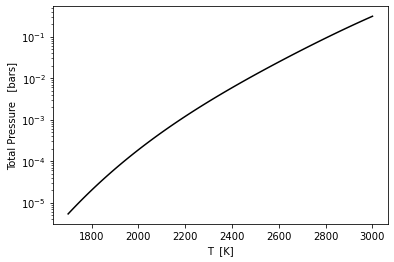

In [29]:
plt.figure()
plt.semilogy(T, Ptotal, 'k-')
plt.xlabel('T  [K]')
plt.ylabel('Total Pressure   [bars]')

In [30]:
plt.rc('axes', prop_cycle=(cycler(linestyle=['-', '--', ':', '-.'])*
                           cycler(color=['c','m','k','y','r','g','b'])))

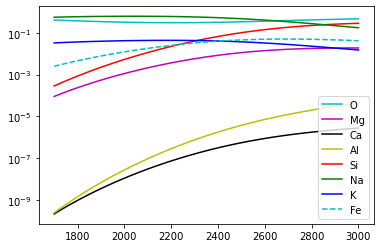

In [31]:
plt.figure()
plt.semilogy(T, mol_elem_frac.T.values)
plt.legend(mol_elem_frac.index)


Text(0, 0.5, 'Density [mol / cm$^2$ ?]')

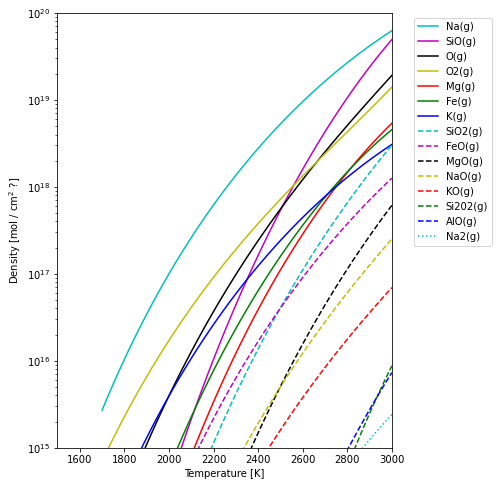

In [32]:

# linestyle_cycler = cycler('linestyle',['-','--',':','-.'])
# plt.rc('axes', prop_cycle=linestyle_cycler)

plt.figure(figsize=(6,8))
plt.semilogy(T, density_high.T.values);
plt.ylim(1e15,1e20)
plt.xlim(1499,3001)
plt.legend(list(density_high.index), bbox_to_anchor=(1.05, 1))
plt. xlabel('Temperature [K]')
plt.ylabel(r'Density [mol / cm$^2$ ?]')

In [33]:
density

1700.0        1713.0        1726.0        1739.0  \
O2(g)     7.016469e+14  8.236374e+14  9.646641e+14  1.127347e+15   
O(g)      5.353551e+13  6.650056e+13  8.234396e+13  1.016460e+14   
Mg(g)     4.040848e+11  5.505683e+11  7.463184e+11  1.006616e+12   
MgO(g)    2.967183e+09  4.207913e+09  5.934237e+09  8.323266e+09   
Mg2(g)    9.090985e-02  1.667576e-01  3.027818e-01  5.443124e-01   
Ca(g)     5.155725e+05  7.536782e+05  1.094991e+06  1.581344e+06   
CaO(g)    5.136863e+04  7.571167e+04  1.109038e+05  1.614769e+05   
Ca2(g)    5.084065e-13  1.072921e-12  2.236641e-12  4.607031e-12   
Al(g)     3.389612e+03  5.475739e+03  8.778795e+03  1.397024e+04   
AlO(g)    5.950921e+05  9.046329e+05  1.366166e+06  2.049949e+06   
AlO2(g)   1.420474e+04  2.163206e+04  3.272579e+04  4.918949e+04   
Al2(g)    1.462283e-14  3.492505e-14  8.226832e-14  1.911874e-13   
Al2O(g)   1.910163e-02  3.512331e-02  6.394539e-02  1.152953e-01   
Al2O2(g)  1.679068e-01  2.933213e-01  5.077738e-01  8.712394e-01   
Si(g)     1.723133e+01  2.995862e+01  5.163768e+01  8.825547e+01   
SiO(g)    5.093366e+11  7.124761e+11  9.913505e+11  1.372239e+12   
SiO2(g)   1.540686e+11  2.079100e+11  2.792638e+11  3.734034e+11   
Si2(g)    1.133156e-14  2.859227e-14  7.110146e-14  1.743125e-13   
Si202(g)  8.315491e+01  1.500647e+02  2.682905e+02  4.752956e+02   
Si3(g)    7.301070e-29  2.582622e-28  8.955011e-28  3.045150e-27   
Na(g)     2.706338e+15  3.254667e+15  3.902519e+15  4.665813e+15   
NaO(g)    8.374657e+10  1.090222e+11  1.413497e+11  1.825348e+11   
Na2(g)    5.362986e+07  7.448584e+07  1.029021e+08  1.414203e+08   
Na2O(g)   3.120574e+06  4.292990e+06  5.876075e+06  8.003252e+06   
K(g)      9.360264e+13  1.133189e+14  1.367689e+14  1.645791e+14   
KO(g)     3.816706e+10  4.928567e+10  6.339172e+10  8.121985e+10   
KO2(g)    1.580348e+05  2.147520e+05  2.904728e+05  3.911118e+05   
K2(g)     5.336724e+04  7.578356e+04  1.070017e+05  1.502381e+05   
K2O(g)    9.351635e+03  1.306343e+04  1.815159e+04  2.509064e+04   
Fe(g)     3.313598e+12  4.317136e+12  5.600345e+12  7.234384e+12   
FeO(g)    1.277586e+12  1.645771e+12  2.111406e+12  2.697977e+12   

                1752.0        1765.0        1778.0        1791.0  \
O2(g)     1.314615e+15  1.529739e+15  1.776362e+15  2.058536e+15   
O(g)      1.250921e+14  1.534892e+14  1.877850e+14  2.290899e+14   
Mg(g)     1.351082e+12  1.804790e+12  2.399643e+12  3.176055e+12   
MgO(g)    1.161200e+10  1.611594e+10  2.225311e+10  3.057459e+10   
Mg2(g)    9.690406e-01  1.708871e+00  2.985692e+00  5.169413e+00   
Ca(g)     2.270354e+06  3.240943e+06  4.600621e+06  6.495070e+06   
CaO(g)    2.337298e+05  3.363688e+05  4.813614e+05  6.850708e+05   
Ca2(g)    9.379135e-12  1.887722e-11  3.757164e-11  7.396710e-11   
Al(g)     2.207111e+04  3.462332e+04  5.393955e+04  8.346573e+04   
AlO(g)    3.056714e+06  4.530025e+06  6.673296e+06  9.773095e+06   
AlO2(g)   7.346925e+04  1.090559e+05  1.609016e+05  2.359910e+05   
Al2(g)    4.384844e-13  9.927715e-13  2.219592e-12  4.901733e-12   
Al2O(g)   2.059203e-01  3.643895e-01  6.390022e-01  1.110700e+00   
Al2O2(g)  1.481945e+00  2.499414e+00  4.180587e+00  6.935994e+00   
Si(g)     1.496001e+02  2.515476e+02  4.196489e+02  6.947161e+02   
SiO(g)    1.889861e+12  2.589873e+12  3.532032e+12  4.794197e+12   
SiO2(g)   4.970620e+11  6.588015e+11  8.694651e+11  1.142731e+12   
Si2(g)    4.214471e-13  1.005222e-12  2.366035e-12  5.497321e-12   
Si202(g)  8.345385e+02  1.452588e+03  2.506911e+03  4.290614e+03   
Si3(g)    1.015986e-26  3.327336e-26  1.070093e-25  3.380981e-25   
Na(g)     5.562660e+15  6.613613e+15  7.841940e+15  9.273914e+15   
NaO(g)    2.348040e+11  3.008923e+11  3.841478e+11  4.886547e+11   
Na2(g)    1.933701e+08  2.630918e+08  3.562173e+08  4.800206e+08   
Na2O(g)   1.084790e+07  1.463431e+07  1.965129e+07  2.626919e+07   
K(g)      1.974666e+14  2.362509e+14  2.818660e+14  3.353729e+14   
KO(g)     1.036685e+11  1.318322e+11  1.670406e+11  2.109026e+11   
KO2

In [34]:
# OX = density.loc[['O2','O']]
# MgX = density.loc[['Mg(g)','MgO(g)','Mg2(g)']]
# CaX = density.loc[['Ca(g)', 'CaO(g)', 'Ca2(g)']]
# AlX = density.loc[['Al(g)', 'AlO(g)', 'AlO2(g)', 'Al2(g)', 'Al2O(g)', 'Al2O2(g)']]
# SiX = density.loc[['Si(g)','SiO(g)', 'SiO2(g)', 'Si2(g)', 'Si202(g)', 'Si3(g)']]
# NaX = density.loc[['Na(g)', 'NaO(g)','Na2(g)', 'Na2O(g)']]
# KX = density.loc[['K(g)', 'KO(g)', 'KO2(g)', 'K2(g)', 'K2O(g)']]
# FeX = density.loc[['Fe(g)', 'FeO(g)']]

In [57]:
OX  = logP.loc[['O2(g)','O(g)']]
MgX = logP.loc[['Mg(g)','MgO(g)','Mg2(g)']]
CaX = logP.loc[['Ca(g)', 'CaO(g)', 'Ca2(g)']]
AlX = logP.loc[['Al(g)','AlO(g)','AlO2(g)','Al2(g)','Al2O(g)','Al2O2(g)']]
SiX = logP.loc[['Si(g)','SiO(g)', 'SiO2(g)','Si2(g)', 'Si3(g)']]
NaX = logP.loc[['Na(g)', 'NaO(g)','Na2(g)']]
KX  = logP.loc[['K(g)', 'KO(g)', 'K2(g)']]
FeX = logP.loc[['Fe(g)', 'FeO(g)']]
#TiX = serie_logP.loc[['TiO(g)', 'Ti(g)','TiO2(g)']]
#CrX = serie_logP.loc[['Cr(g)', 'CrO(g)', 'CrO2(g)', 'CrO3(g)']]
#PX = serie_logP.loc[['P(g)', 'P2(g)', 'PO(g)', 'P4O6(g)', 'P4O10(g)']]
#HX = serie_logP.loc[['H2O(g)', 'OH(g)', 'HO2(g)']]

lMX = [MgX,CaX,AlX,SiX,NaX,KX,FeX]#,TiX,CrX,PX] 

In [36]:
for iMX in SiX.T:
    SiX.loc[iMX]

In [58]:
def plot_MX(MX, OX, T,figure=None, invT=False):
    
    lloc='lower right'
    xlabel='Temperature [K]'
    
    if invT==True:
        T = 1e4/T
        xlabel='1e4/T [1/K]'
        lloc='lower left'
    if figure is None:
        plt.figure(figsize=(6,8))
        
    plt.semilogy(T, OX.loc['O2(g)'],'-',color=[.5,.5,.5], label='O2');
    plt.semilogy(T, OX.loc['O(g)'],'--',color=[.5,.5,.5], label='O');
    
    for iMX in MX.T:
        idat = MX.loc[iMX]
        plt.semilogy(T, idat, label=iMX);
    



    specs = list(MX.index)
    specs.extend(list(OX.index))

    #plt.ylim(1e-30,1e0)
    plt.xlim(1760,2400)
    #plt.legend(specs, bbox_to_anchor=(1.05, 1))
    plt.legend(loc=lloc)
    plt. xlabel(xlabel)
    plt.ylabel(r'Partial Pressure [bars]')
    plt.tight_layout()
    return plt.gcf().number

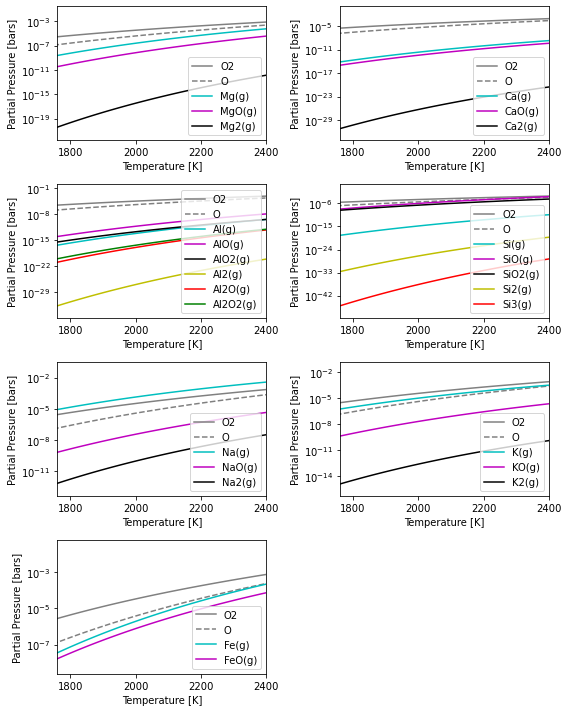

In [47]:
'''Multiplot'''
figure, ax0 = plt.subplots(4,2,figsize=[8,10],num = 0)
for mm, MX in enumerate(lMX):
    #title = comps['Material'].iloc[mm]
    ax = plt.subplot(4, 2, mm+1)
    T = np.array(logP.T.index.values.tolist())
    plot_MX(10**MX,10**OX, T, figure=figure)  # pass logP (T is in index)
    figure.axes.append(ax)

plt.delaxes(ax0[3,1])  # remove subplot (4,2) which is empty
plt.draw()
plt.tight_layout()
plt.savefig('data/multiplot_Schaefer2009_logP.png', dpi=450)




array([1700., 1713., 1726., 1739., 1752., 1765., 1778., 1791., 1804.,
       1817., 1830., 1843., 1856., 1869., 1882., 1895., 1908., 1921.,
       1934., 1947., 1960., 1973., 1986., 1999., 2012., 2025., 2038.,
       2051., 2064., 2077., 2090., 2103., 2116., 2129., 2142., 2155.,
       2168., 2181., 2194., 2207., 2220., 2233., 2246., 2259., 2272.,
       2285., 2298., 2311., 2324., 2337., 2350., 2363., 2376., 2389.,
       2402., 2415., 2428., 2441., 2454., 2467., 2480., 2493., 2506.,
       2519., 2532., 2545., 2558., 2571., 2584., 2597., 2610., 2623.,
       2636., 2649., 2662., 2675., 2688., 2701., 2714., 2727., 2740.,
       2753., 2766., 2779., 2792., 2805., 2818., 2831., 2844., 2857.,
       2870., 2883., 2896., 2909., 2922., 2935., 2948., 2961., 2974.,
       2987., 3000.])

1

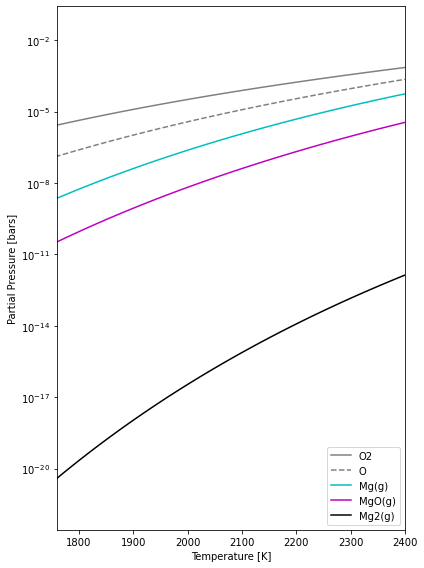

In [55]:
plot_MX(10**MgX,10**OX, T)

In [59]:
plot_MX(10**NaX, 10**OX, T)

1

In [60]:
plot_MX(10**FeX, 10**OX, T)

1

1

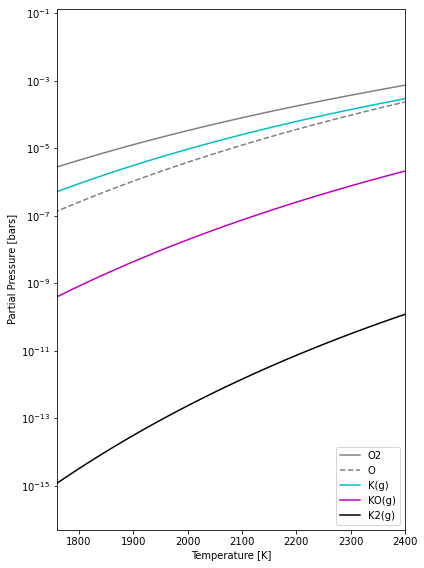

In [61]:
plot_MX(10**KX, 10**OX, T)

In [62]:
plot_MX(10**AlX, 10**OX, T)

1

In [63]:
#plot_MX(CaX, OX, T)